<a href="https://colab.research.google.com/github/alrb2005/MechaineLearing-0716-/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test)= load_data()

In [59]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 9


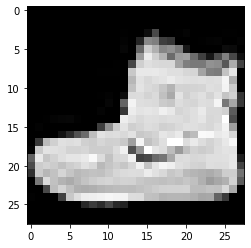

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [61]:
Labellist={0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

In [62]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(512, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [65]:
# from tensorflow.keras.utils import to_categorical
# y_train_cat = to_categorical(y_train, num_classes=10)
# y_test_cat = to_categorical(y_test, num_classes=10)
# print(y_train[0])
# print(y_train_cat[0])
#因為上面SpareseCatgoricalCrossentropy 會幫你做one-hot encoding， 所以這邊就不用了


In [66]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 2s - loss: 0.5330 - accuracy: 0.8133 - val_loss: 0.4208 - val_accuracy: 0.8532
Epoch 2/50
270/270 - 2s - loss: 0.3899 - accuracy: 0.8620 - val_loss: 0.4049 - val_accuracy: 0.8468
Epoch 3/50
270/270 - 3s - loss: 0.3520 - accuracy: 0.8737 - val_loss: 0.3505 - val_accuracy: 0.8768
Epoch 4/50
270/270 - 3s - loss: 0.3164 - accuracy: 0.8851 - val_loss: 0.3298 - val_accuracy: 0.8828
Epoch 5/50
270/270 - 3s - loss: 0.2976 - accuracy: 0.8919 - val_loss: 0.3360 - val_accuracy: 0.8790
Epoch 6/50
270/270 - 3s - loss: 0.2809 - accuracy: 0.8966 - val_loss: 0.3286 - val_accuracy: 0.8830
Epoch 7/50
270/270 - 2s - loss: 0.2693 - accuracy: 0.9025 - val_loss: 0.3209 - val_accuracy: 0.8860
Epoch 8/50
270/270 - 2s - loss: 0.2556 - accuracy: 0.9059 - val_loss: 0.3256 - val_accuracy: 0.8827
Epoch 9/50
270/270 - 2s - loss: 0.2466 - accuracy: 0.9104 - val_loss: 0.3073 - val_accuracy: 0.8902
Epoch 10/50
270/270 - 2s - loss: 0.2348 - accuracy: 0.9135 - val_loss: 0.3034 - val_accuracy: 0.8913

In [68]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8898


[0.32542359828948975, 0.8898000121116638]

In [69]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [70]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(Labellist[i]) for i in range(10)],
       columns=["{}(預測)".format(Labellist[i]) for i in range(10)])

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),887,1,6,14,4,1,82,0,5,0
Trouser(真實),3,973,0,16,3,0,4,0,1,0
Pullover(真實),25,0,772,10,79,0,113,0,1,0
Dress(真實),33,3,8,877,47,0,28,0,4,0
Coat(真實),0,0,79,15,805,0,100,0,1,0
Sandal(真實),0,0,0,1,0,969,0,16,1,13
Shirt(真實),146,0,47,23,43,0,735,0,6,0
Sneaker(真實),0,0,0,0,0,11,0,936,1,52
Bag(真實),6,0,6,2,2,2,6,5,971,0
Ankle boot(真實),0,0,0,0,0,5,1,21,0,973


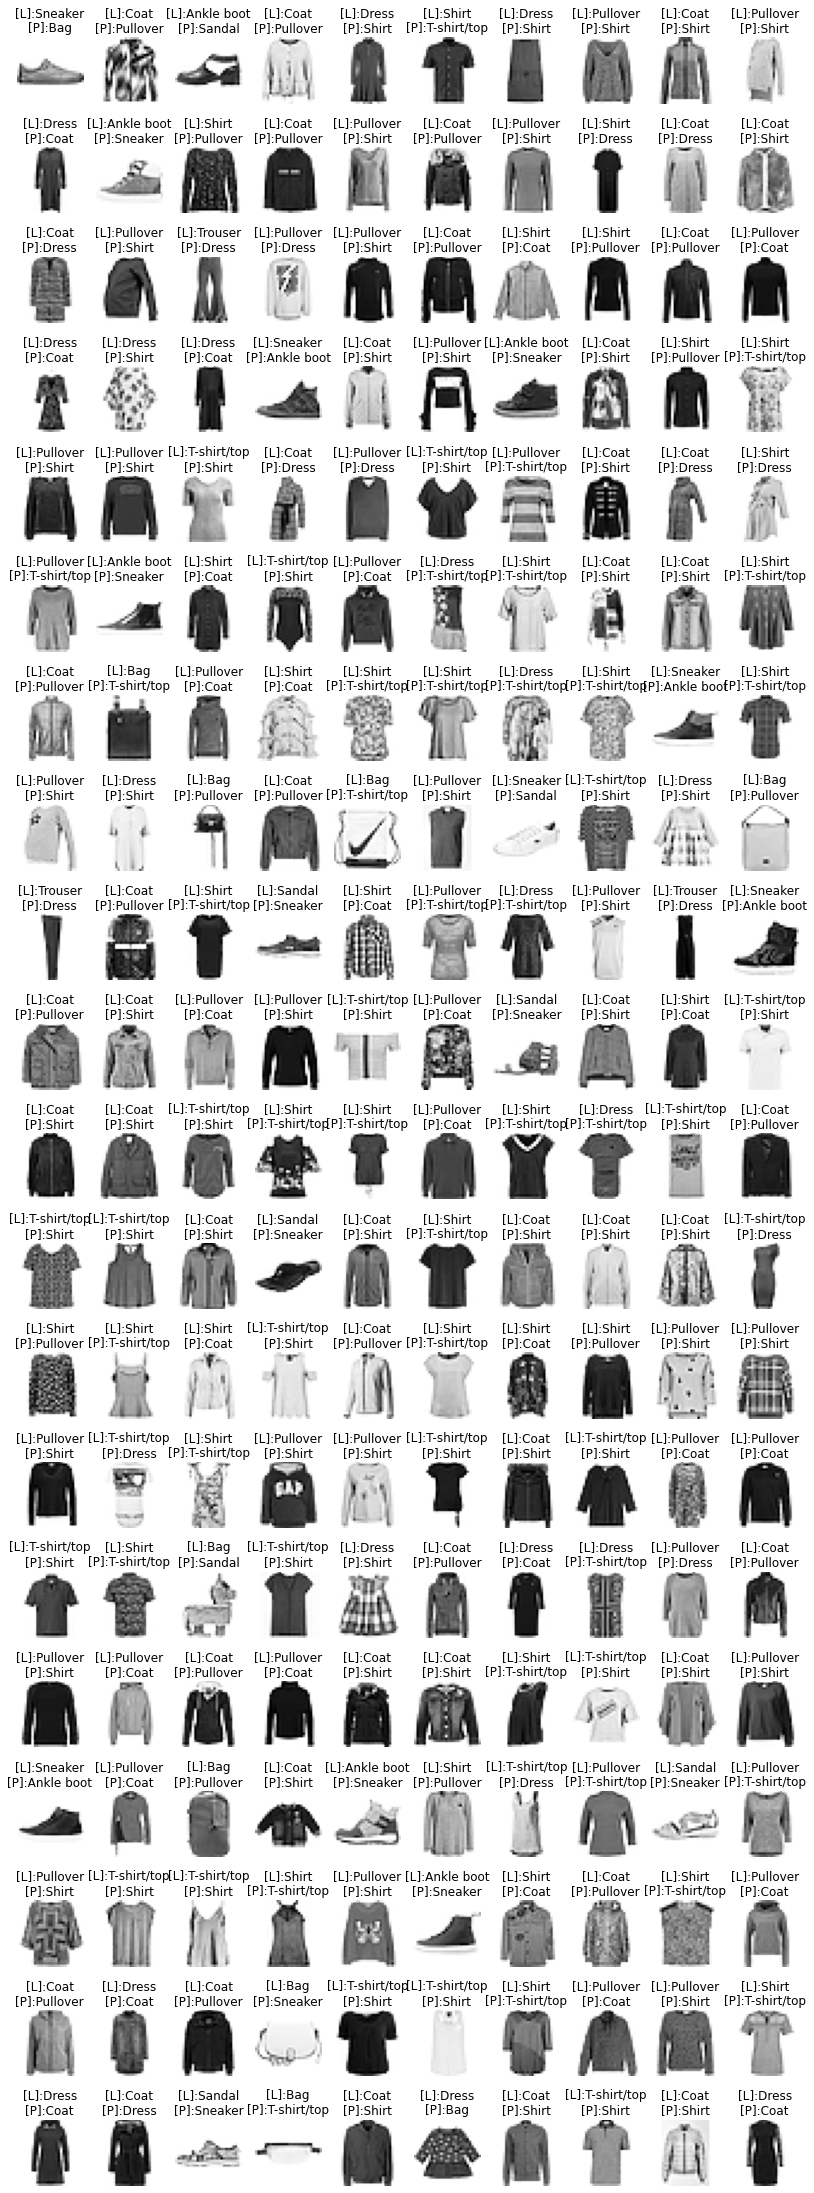

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.nonzero(pre != y_test)[0] # 這是一個tuple型式的，第一個array是X，另一個array是Y，這邊只有一維，所以取[0]
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(Labellist[label], Labellist[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Greys")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Greys")